# Import the required libraries and load the data

In [56]:
# ignore warnings :
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [57]:
ecom=pd.read_csv(r'D:/data/renttherunway.csv')

In [58]:
ecom.head()

,id,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,18-Jun-13
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,14-Dec-15
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,12-Feb-14
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,26-Sep-16


In [59]:
ecom.shape

(192543, 16)

In [60]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192543 entries, 0 to 192542
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              192543 non-null  int64  
 1   fit             192543 non-null  object 
 2   user_id         192543 non-null  int64  
 3   bust size       174132 non-null  object 
 4   item_id         192543 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192461 non-null  float64
 7   rented for      192533 non-null  object 
 8   review_text     192481 non-null  object 
 9   body type       177906 non-null  object 
 10  review_summary  192198 non-null  object 
 11  category        192543 non-null  object 
 12  height          191866 non-null  object 
 13  size            192543 non-null  int64  
 14  age             191583 non-null  float64
 15  review_date     192543 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

# Data cleansing and Exploratory data analysis

# 3. Check if there are any duplicate records in the dataset? If any, drop them

In [6]:
ecom[ecom.duplicated()]

,id,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


# 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [7]:
ecom.columns

Index(['id', 'fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [8]:
ecom.drop(['id','review_text'], axis=1,inplace=True)

# 5.Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float.

In [9]:
ecom['weight'].dtypes

dtype('O')

In [10]:
ecom.dtypes

fit                object
user_id             int64
bust size          object
item_id             int64
weight             object
rating            float64
rented for         object
body type          object
review_summary     object
category           object
height             object
size                int64
age               float64
review_date        object
dtype: object

In [12]:
ecom['weight'].fillna(value = 0,inplace = True)
ecom['weight']=ecom['weight'].replace({"lbs":" "}, regex=True).map(pd.eval).astype(float)

In [13]:
ecom['weight'].dtypes

dtype('float64')

# 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'

In [16]:
ecom['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [15]:
ecom['rented for']=ecom['rented for'].replace(['party: cocktail'],'party')

# 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype

In [18]:
ecom["height"]

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192538    5' 9"
192539    5' 1"
192540    5' 8"
192541    5' 6"
192542    5' 6"
Name: height, Length: 192543, dtype: object

In [8]:
ecom["height"].apply(lambda x: x.replace(' ' ', '').replace('"', ' '))astype('float')

SyntaxError: EOL while scanning string literal (<ipython-input-8-fd33ddbb36ac>, line 1)

# 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [61]:
ecom.isnull().sum()

id                    0
fit                   0
user_id               0
bust size         18411
item_id               0
weight            29981
rating               82
rented for           10
review_text          62
body type         14637
review_summary      345
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [10]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192543 entries, 0 to 192542
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              192543 non-null  int64  
 1   fit             192543 non-null  object 
 2   user_id         192543 non-null  int64  
 3   bust size       174132 non-null  object 
 4   item_id         192543 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192461 non-null  float64
 7   rented for      192533 non-null  object 
 8   review_text     192481 non-null  object 
 9   body type       177906 non-null  object 
 10  review_summary  192198 non-null  object 
 11  category        192543 non-null  object 
 12  height          192543 non-null  object 
 13  size            192543 non-null  int64  
 14  age             191583 non-null  float64
 15  review_date     192543 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [65]:
updated_ecom = ecom
updated_ecom = updated_ecom.isnull()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'mean')
data_new = my_imputer.fit_transform(updated_ecom)
updated_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192543 entries, 0 to 192542
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id              192543 non-null  bool 
 1   fit             192543 non-null  bool 
 2   user_id         192543 non-null  bool 
 3   bust size       192543 non-null  bool 
 4   item_id         192543 non-null  bool 
 5   weight          192543 non-null  bool 
 6   rating          192543 non-null  bool 
 7   rented for      192543 non-null  bool 
 8   review_text     192543 non-null  bool 
 9   body type       192543 non-null  bool 
 10  review_summary  192543 non-null  bool 
 11  category        192543 non-null  bool 
 12  height          192543 non-null  bool 
 13  size            192543 non-null  bool 
 14  age             192543 non-null  bool 
 15  review_date     192543 non-null  bool 
dtypes: bool(16)
memory usage: 2.9 MB


# 9. Check the statistical summary for the numerical and categorical columns and write your findings. 

In [12]:
ecom.describe()

,id,user_id,item_id,rating,size,age
count,192543.000000,192543.000000,1.925430e+05,192461.000000,192543.000000,191583.000000
mean,96271.019590,499492.878225,1.045682e+06,9.092388,12.245218,33.871058
std,55582.554045,289059.972687,8.053167e+05,1.430031,8.494878,8.058084
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.500000,250653.500000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.000000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144406.500000,750975.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [13]:
#Categorical Columns
ecom.select_dtypes(include=['object']).columns.tolist()

['fit',
 'bust size',
 'weight',
 'rented for',
 'review_text',
 'body type',
 'review_summary',
 'category',
 'height',
 'review_date']

In [14]:
#Numerical Columns
ecom.select_dtypes(exclude=['object']).columns.tolist()

['id', 'user_id', 'item_id', 'rating', 'size', 'age']

# 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

<AxesSubplot:xlabel='age'>

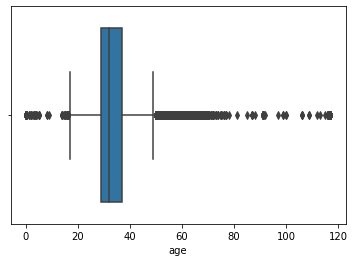

In [15]:
sns.boxplot(ecom['age'])

In [16]:
q1=ecom['age'].quantile(0.25)
q1=ecom['age'].quantile(0.50)
q3=ecom['age'].quantile(0.75)

In [17]:
iqr=q3-q1

In [18]:
upper_limit=q3+1.5*(iqr)

In [19]:
lower_limit=q1-1.5*(iqr)

In [20]:
ecom_wo_out=ecom.loc[(ecom['age']>lower_limit) & (ecom['age']<upper_limit)]

<AxesSubplot:xlabel='age'>

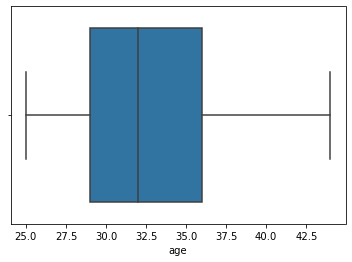

In [21]:
sns.boxplot(ecom_wo_out['age'])

# 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

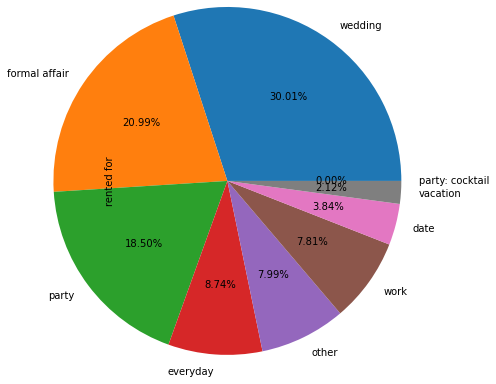

In [34]:
ecom['rented for'].value_counts().plot(kind='pie',radius=2,autopct='%1.2f%%')
plt.show()

# ● Data Preparation for model building: 
   

# 12. Encode the categorical variables in the dataset.

In [44]:
#Categorical Columns
ecom.select_dtypes(include=['object']).columns

Index(['fit', 'bust size', 'weight', 'rented for', 'review_text', 'body type',
       'review_summary', 'category', 'height', 'review_date'],
      dtype='object')

In [67]:
cate=['fit', 'bust size', 'weight', 'rented for', 'review_text', 'body type',
       'review_summary', 'category', 'height', 'review_date']
l_encode=LabelEncoder()
for i in cate:
    ecom[i]=ecom[[i]].apply(l_encode.fit_transform)

# 13. Standardize the data, so that the values are within a particular range.

In [72]:
df_1=updated_ecom.copy()
scaled_features=StandardScaler().fit_transform(df_1.values)
scaled_features_df1=pd.DataFrame(scaled_features,index=df_1.index,columns=df_1.columns)

In [73]:
scaled_features_df1.head(5)

,id,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0.0,0.0,0.0,-0.325162,0.0,-0.429451,-0.020641,-0.007207,-0.017947,-0.286834,-0.042368,0.0,-0.059401,0.0,-0.070788,0.0
1,0.0,0.0,0.0,-0.325162,0.0,-0.429451,-0.020641,-0.007207,-0.017947,-0.286834,-0.042368,0.0,-0.059401,0.0,-0.070788,0.0
2,0.0,0.0,0.0,3.075393,0.0,2.328555,-0.020641,-0.007207,-0.017947,3.486336,-0.042368,0.0,-0.059401,0.0,-0.070788,0.0
3,0.0,0.0,0.0,-0.325162,0.0,-0.429451,-0.020641,-0.007207,-0.017947,-0.286834,-0.042368,0.0,-0.059401,0.0,-0.070788,0.0
4,0.0,0.0,0.0,-0.325162,0.0,-0.429451,-0.020641,-0.007207,-0.017947,-0.286834,-0.042368,0.0,-0.059401,0.0,-0.070788,0.0


# 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same

In [74]:
cov_matrix=np.cov(scaled_features.T)
cov_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e

In [75]:
eig_vals,eig_vectors=np.linalg.eig(cov_matrix)
print('eigein values:' '\n',eig_vals)
print('\n')
print('eigein vector:' '\n',eig_vectors)

eigein values:
 [1.52955991 1.33398829 0.64834587 0.7404698  0.81554451 0.92460209
 1.00989018 0.99669669 1.00094939 0.         0.         0.
 0.         0.         0.         0.        ]


eigein vector:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]

In [76]:
total=sum(eig_vals)
var_exp=[(i/total)*100 for i in sorted (eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [16.995021841113793, 14.822015137917944, 11.220943761195864, 11.121602129245288, 11.074350202500586, 10.273303201172949, 9.061558640017687, 8.227399522689018, 7.203805564146873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cummulative Variance Explained:  [ 16.99502184  31.81703698  43.03798074  54.15958287  65.23393307
  75.50723627  84.56879491  92.79619444 100.         100.
 100.         100.         100.         100.         100.
 100.        ]


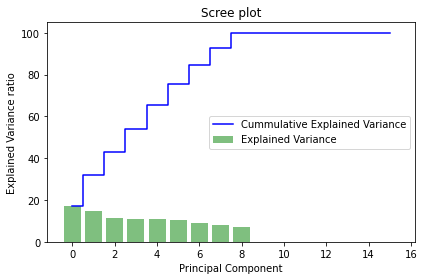

In [77]:
plt.bar(range(0,len(var_exp)),var_exp,align='center',alpha=0.5,color='green',label='Explained Variance')
plt.step(range(0,len(cum_var_exp)),cum_var_exp,where='mid',color='blue',label='Cummulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) 

In [78]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df1),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.599267,-0.000681,0.056882,-0.015675,-0.020370,0.007398,-0.140652,0.023929
1,-0.599267,-0.000681,0.056882,-0.015675,-0.020370,0.007398,-0.140652,0.023929
2,4.982774,-0.383865,-1.144994,0.072917,-0.567837,-0.006956,-0.392971,0.102509
3,-0.599267,-0.000681,0.056882,-0.015675,-0.020370,0.007398,-0.140652,0.023929
4,-0.599267,-0.000681,0.056882,-0.015675,-0.020370,0.007398,-0.140652,0.023929


In [79]:
from sklearn.cluster import KMeans
cluster_errors=[]
cluster_range=range(2,15)
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

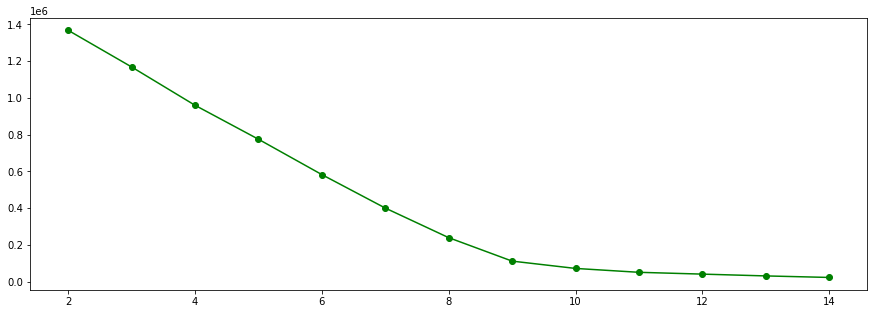

In [81]:
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

#Elbow Plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='g')
plt.show()